# Facebook Prophet Time Series 
###### Working notebook for now, sorry if it's hard to follow.  Tried to add in a few comments.

In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt


In [2]:
target = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')
train = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')

In [3]:
target.tail()

,city,year,weekofyear,total_cases
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1
1455,iq,2010,25,4


In [4]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [5]:
#merge train features and target total_cases into 1 df for ease 
total_train = pd.merge(target,train,how='left',left_on=['city','year','weekofyear'], right_on=['city','year','weekofyear'])
total_train['week_start_date'] = pd.to_datetime(total_train['week_start_date'])
total_train['y'] = total_train['total_cases']
total_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 26 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
total_cases                              1456 non-null int64
week_start_date                          1456 non-null datetime64[ns]
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_

In [6]:
sj = pd.DataFrame(total_train.loc[total_train.city == 'sj'])
iq = pd.DataFrame(total_train.loc[total_train.city == 'iq'])
# fill the null values
# fills with last observation (takes last weeks data) 'ffil' -> forward fill
sj.fillna(method='ffill',inplace=True)
iq.fillna(method='ffill',inplace=True)
print(sj.info())
print(iq.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 26 columns):
city                                     936 non-null object
year                                     936 non-null int64
weekofyear                               936 non-null int64
total_cases                              936 non-null int64
week_start_date                          936 non-null datetime64[ns]
ndvi_ne                                  936 non-null float64
ndvi_nw                                  936 non-null float64
ndvi_se                                  936 non-null float64
ndvi_sw                                  936 non-null float64
precipitation_amt_mm                     936 non-null float64
reanalysis_air_temp_k                    936 non-null float64
reanalysis_avg_temp_k                    936 non-null float64
reanalysis_dew_point_temp_k              936 non-null float64
reanalysis_max_air_temp_k                936 non-null float64
reanalysis_min_air_temp_k  

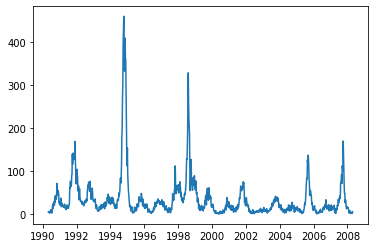

In [7]:
#show time series for both cities 
plt.plot(sj.week_start_date, sj.total_cases)

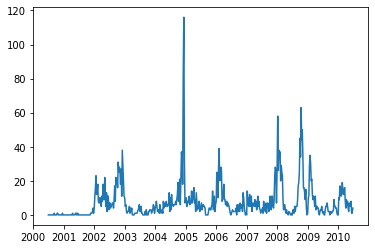

In [8]:
plt.plot(iq.week_start_date, iq.total_cases)

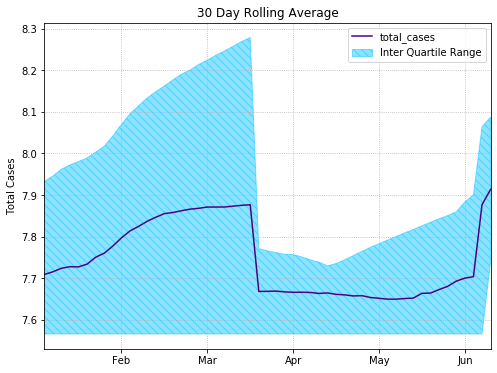

In [9]:
#plotting rolling averages
#used previously for hourly data, not working right for weekly data
# will work on later 

test = iq.loc[:,['week_start_date','total_cases']]
test1 = test.set_index(pd.DatetimeIndex(test['week_start_date']))
test1.drop(columns=['week_start_date'],inplace=True)
season = test1.rolling(window=30*24, center=True, min_periods=4).mean().groupby(test1.index.weekofyear).mean()
q25 = test1.rolling(window=30*24, center=True, min_periods=4).mean().groupby(test1.index.weekofyear).quantile(.25)
q75 = test1.rolling(window=30*24, center=True, min_periods=4).mean().groupby(test1.index.weekofyear).quantile(.75)

f, ax = plt.subplots(figsize=(8,6))

ax.fill_between(season.index,q25.values.ravel(),q75.values.ravel(),color='#00BFFF',hatch='\\\\\\', alpha=0.45, label='Inter Quartile Range')
season.plot(ax=ax, color='#4B0082')
#month_list = pd.date_range('06/01/2015','09/22/2019 23:00:00',freq='24H')
ax.set_xlabel('Day Of Year')
ax.set_ylabel('Total Cases')
ax.set_title('30 Day Rolling Average')

month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
ax.set_xlabel('')
#ax.xaxis.set_major_locator(months)
ax.set_xticklabels(month_names)
ax.grid(ls=':')

plt.legend()

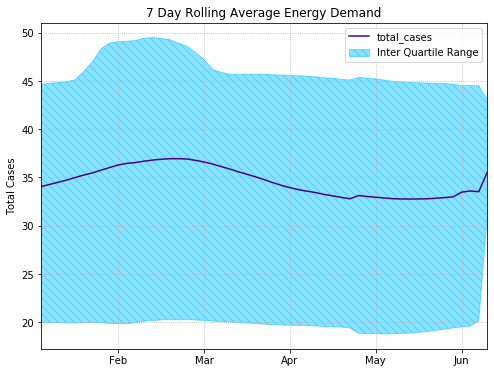

In [10]:
test = sj.loc[:,['week_start_date','total_cases']]
test1 = test.set_index(pd.DatetimeIndex(test['week_start_date']))
test1.drop(columns=['week_start_date'],inplace=True)
season = test1.rolling(window=7*24, center=True).mean().groupby(test1.index.weekofyear).mean()
q25 = test1.rolling(window=7*24, center=True).mean().groupby(test1.index.weekofyear).quantile(.25)
q75 = test1.rolling(window=7*24, center=True).mean().groupby(test1.index.weekofyear).quantile(.75)

f, ax = plt.subplots(figsize=(8,6))

ax.fill_between(season.index,q25.values.ravel(),q75.values.ravel(),color='#00BFFF',hatch='\\\\\\', alpha=0.45, label='Inter Quartile Range')
season.plot(ax=ax, color='#4B0082')
#month_list = pd.date_range('06/01/2015','09/22/2019 23:00:00',freq='24H')
ax.set_xlabel('Day Of Year')
ax.set_ylabel('Total Cases')
ax.set_title('7 Day Rolling Average Energy Demand')

month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
ax.set_xlabel('')
#ax.xaxis.set_major_locator(months)
ax.set_xticklabels(month_names)
ax.grid(ls=':')

plt.legend()

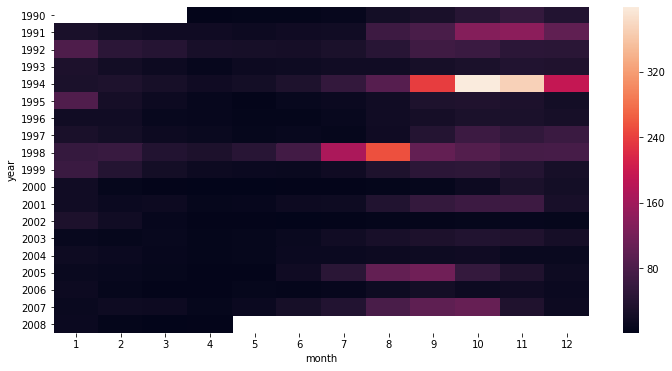

In [11]:
# heat map rather than bar graph for total num cases per month per year
# 

import seaborn as sns

test = sj.loc[:,['week_start_date','y']]
test1 = test.set_index(pd.DatetimeIndex(test['week_start_date']))
test1.drop(columns=['week_start_date'],inplace=True)
test1['month'] = test1.index.month
test1['year'] = test1.index.year
heat = test1.groupby(['year','month']).mean().unstack()
heat.columns = heat.columns.droplevel(0)
f,ax = plt.subplots(figsize=(12,6))
sns.heatmap(heat, ax=ax)

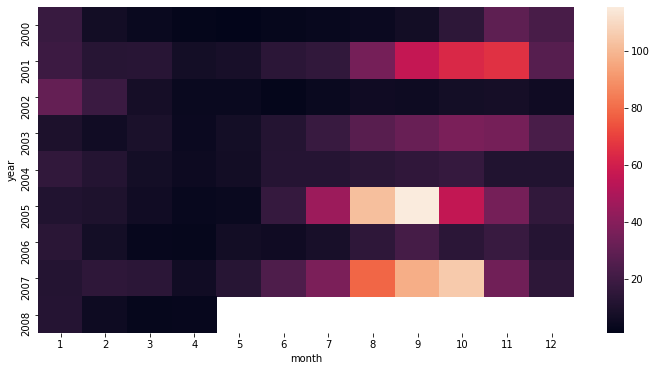

In [12]:
#same heatmap with big years removed so the yearly and bi-yearly trend is a bit more obvious

test = sj.loc[sj.week_start_date.dt.year > 1999,['week_start_date','y']]
test1 = test.set_index(pd.DatetimeIndex(test['week_start_date']))
test1.drop(columns=['week_start_date'],inplace=True)
test1['month'] = test1.index.month
test1['year'] = test1.index.year
heat = test1.groupby(['year','month']).mean().unstack()
heat.columns = heat.columns.droplevel(0)
f,ax = plt.subplots(figsize=(12,6))
sns.heatmap(heat, ax=ax)

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

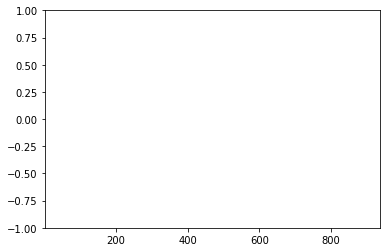

In [13]:
#helps dertime time frame for when the time series trend repeats, more helpful in ARIMA than FBProphet
#haven't messed with getting it to work yet 

from pandas.plotting import autocorrelation_plot, scatter_matrix

autocorrelation_plot(sj.loc[:,['week_start_date','y']])

C:\Users\graha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



26


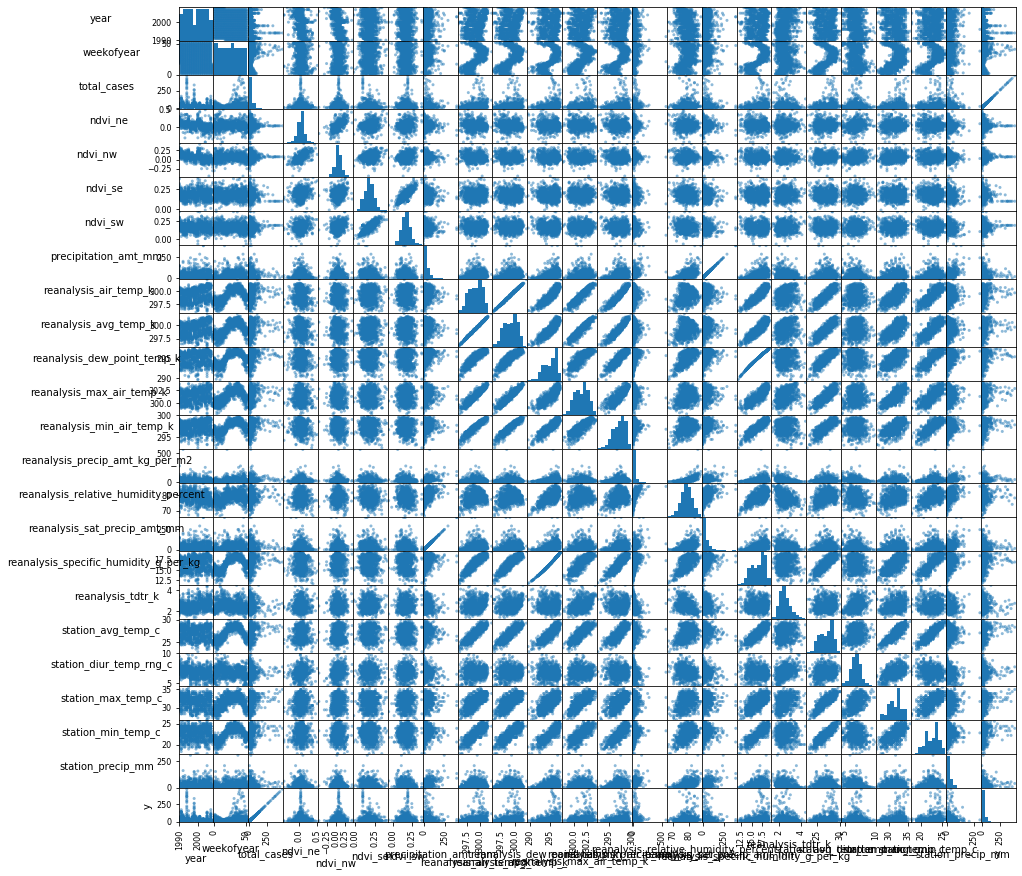

In [14]:
# scatter matrix (used for generating correlation heatmap)
# sometimes visusal is easier to understand than correlation coef for me
# not sure how to get the x labels to rotate, same order so can count how many squares in then cound down to see what
# the x label would be for the square you're interested in

f, axx = plt.subplots(figsize=(15,15))
axs = scatter_matrix(sj, ax=axx)

n = len(sj.columns)
print(n)
for x in range(n-3):
    for y in range(n-3):
        # to get the axis of subplots
        axy = axs[x][y]
        axxx = axs[y][x]
        # to make x axis name vertical  
        axxx.xaxis.label.set_rotation(45)
        # to make y axis name horizontal 
        axy.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        axy.yaxis.labelpad = 50

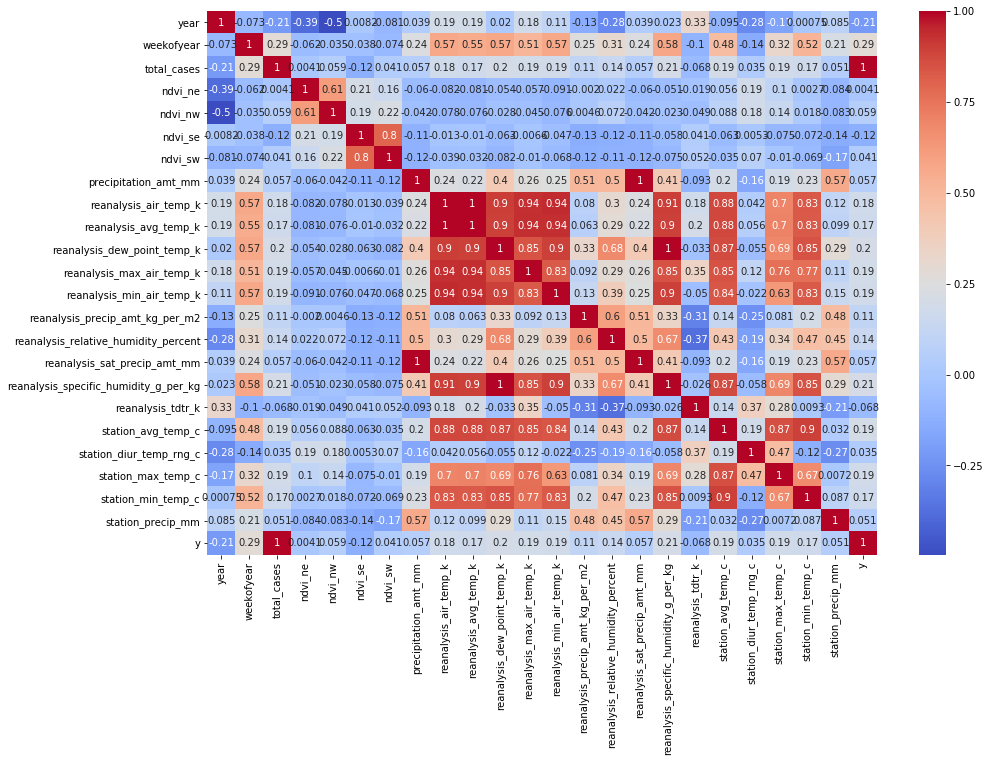

In [15]:
f, ax = plt.subplots(figsize=(15,10))
corr = sj.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           ax=ax,
           annot=True,
           cmap="coolwarm")

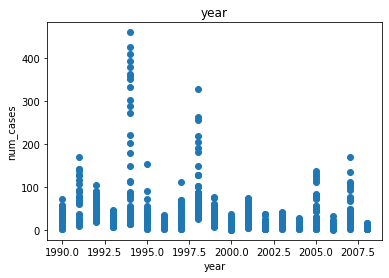

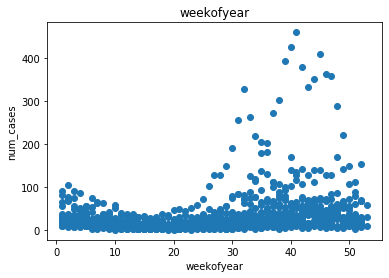

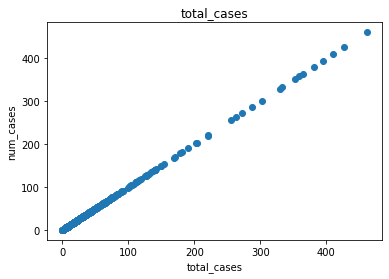

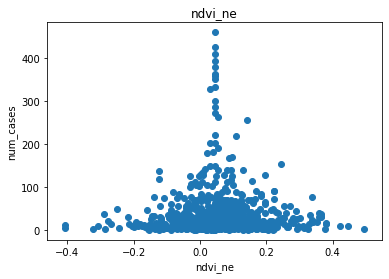

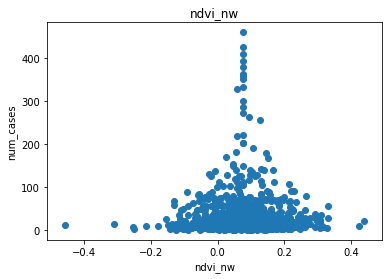

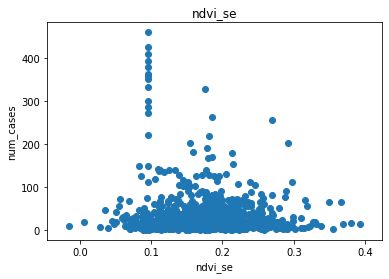

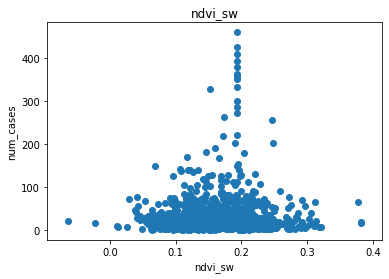

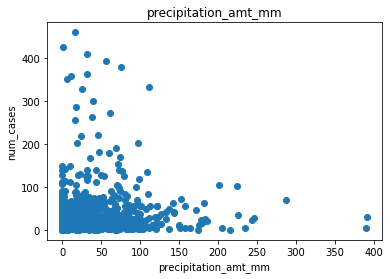

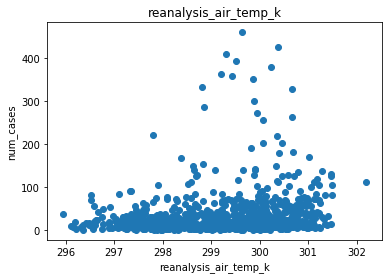

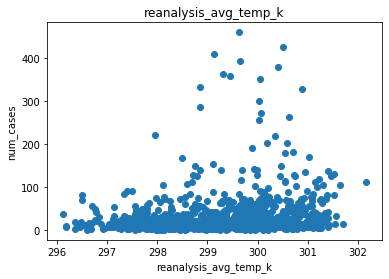

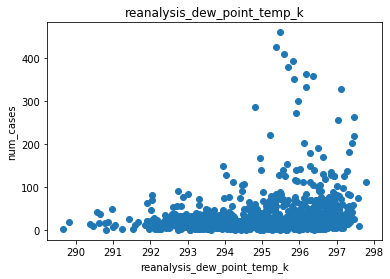

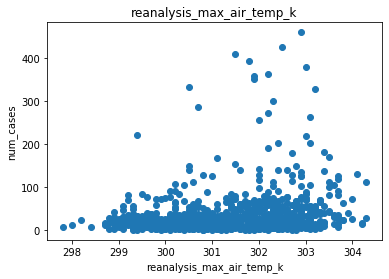

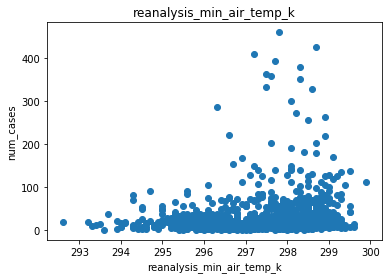

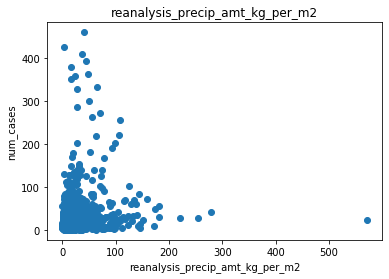

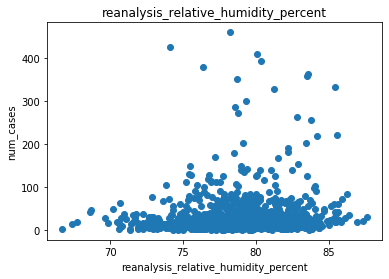

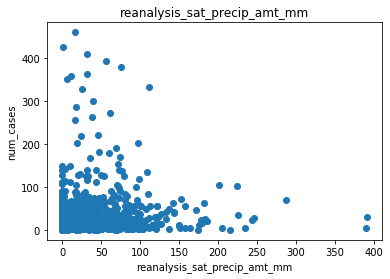

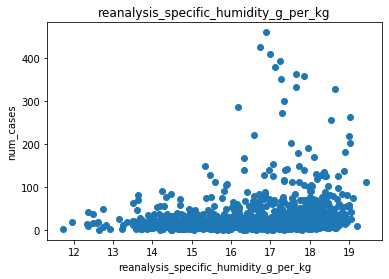

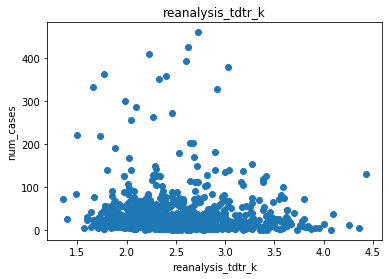

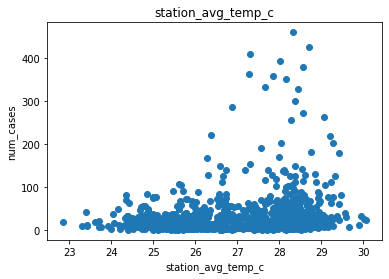

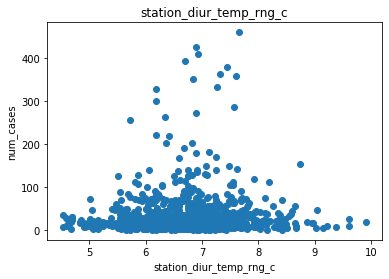

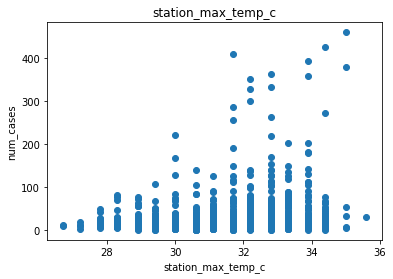

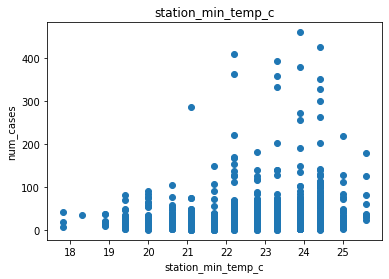

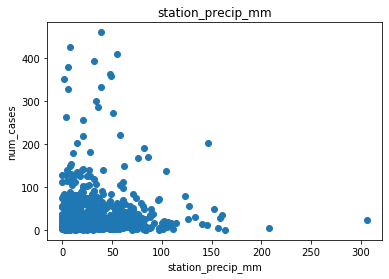

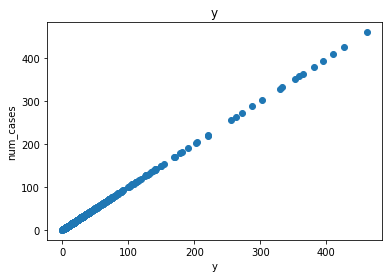

In [16]:
# plots from scatter matrix just showing features correlation with number of cases 
#FBProphet adds in features as "extra_regressors"
#seems as though features with linear correlation with predicted variable are best to use
for col in sj.columns:
    if sj[col].dtype in ['float64','int64']:
        plt.scatter(sj[col],sj['y'])
        plt.title('{}'.format(col))
        plt.xlabel('{}'.format(col))
        plt.ylabel('num_cases')
        plt.show()

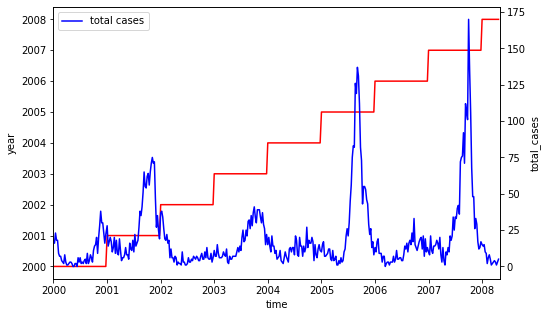

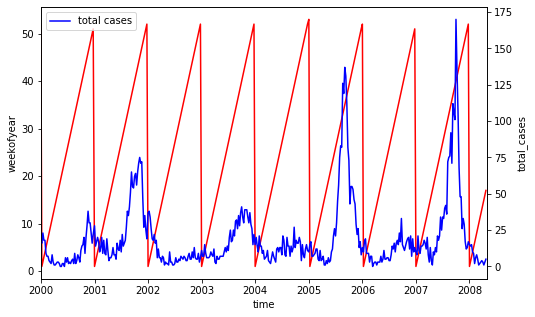

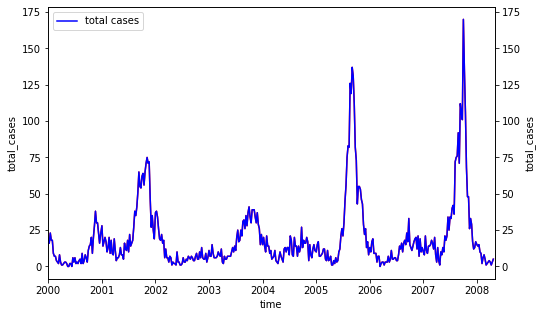

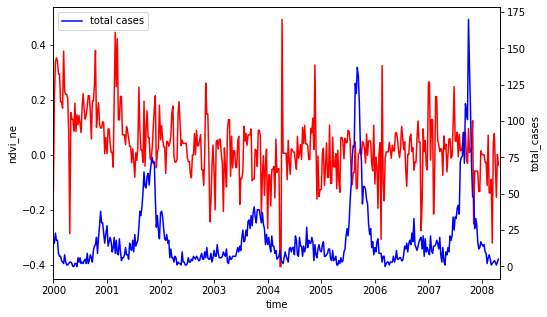

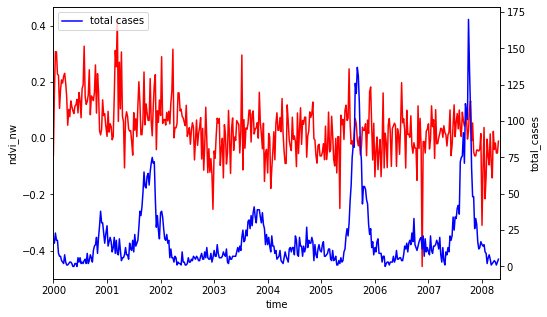

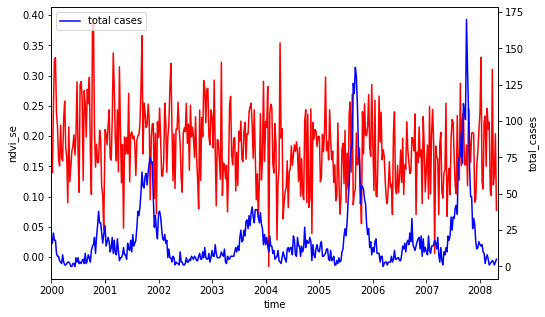

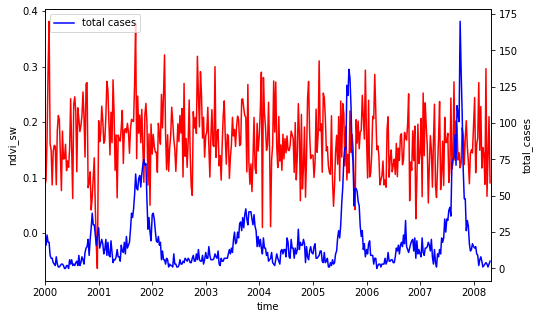

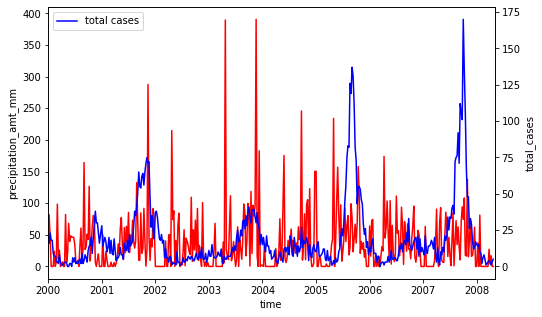

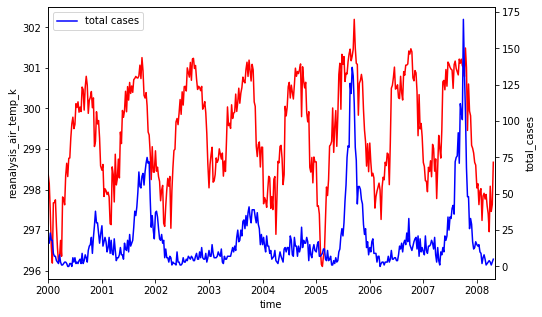

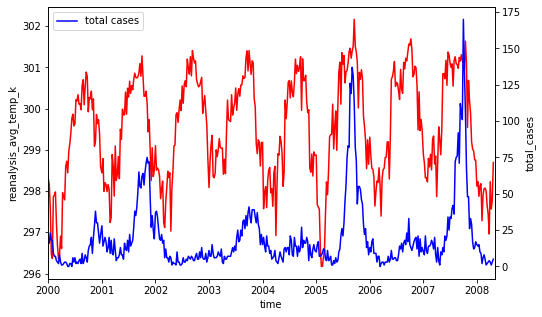

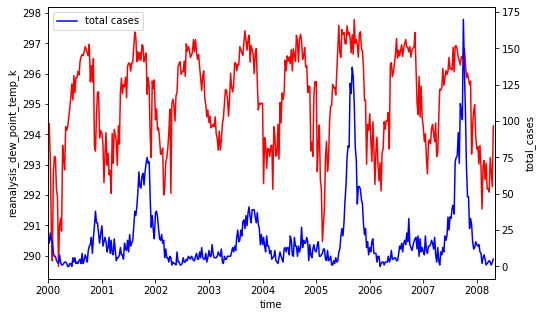

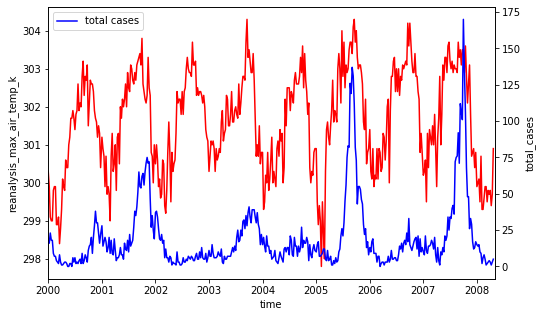

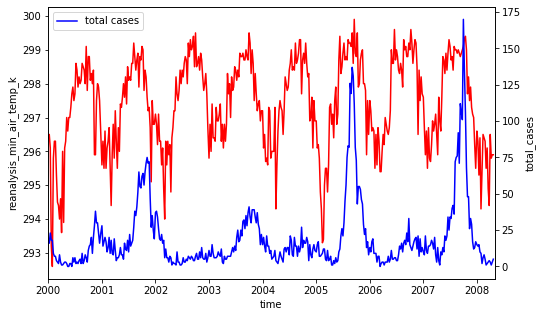

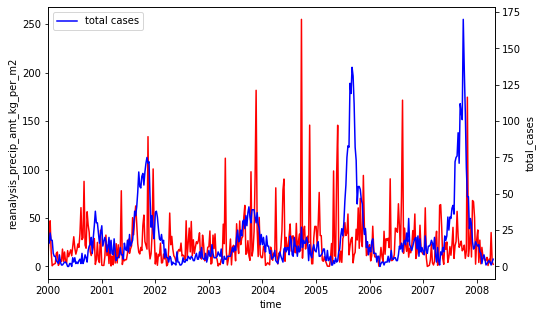

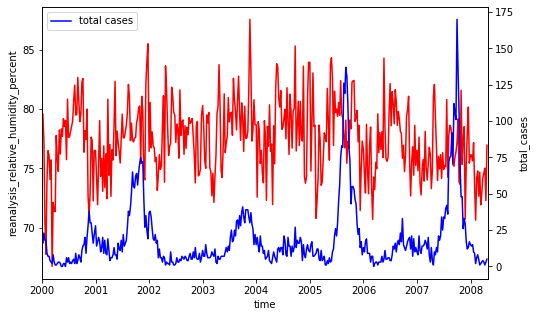

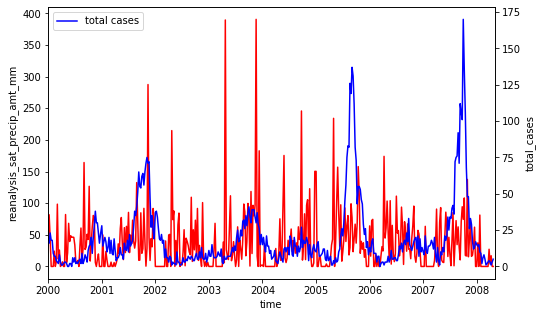

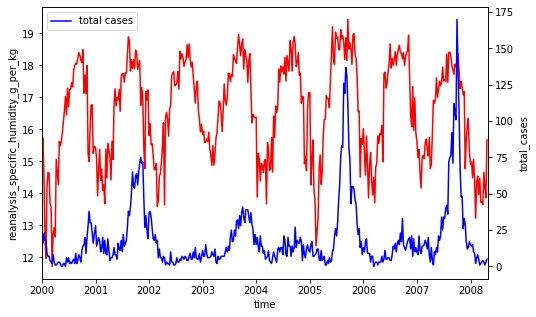

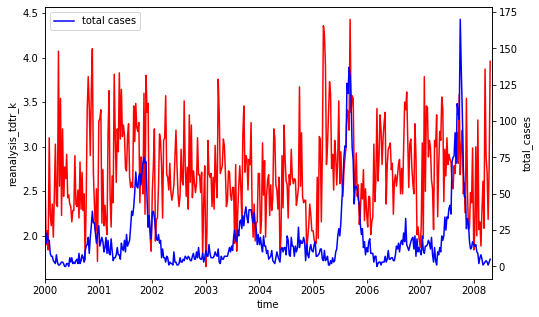

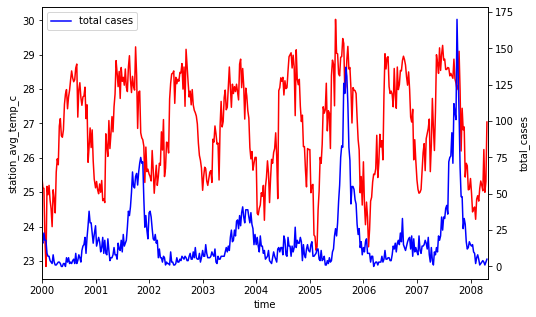

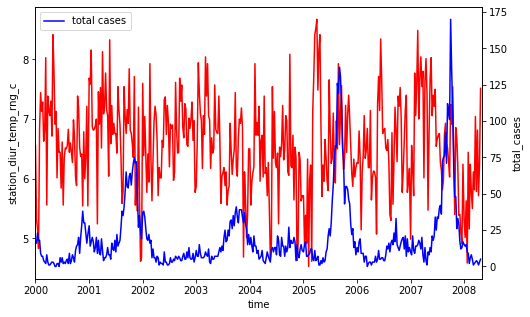

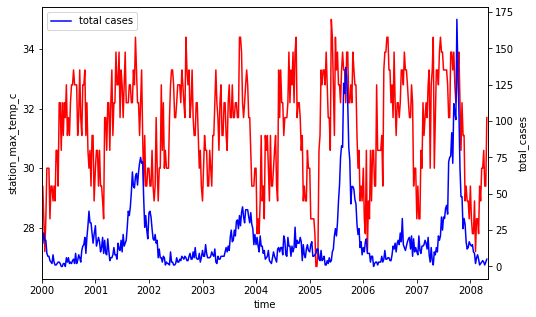

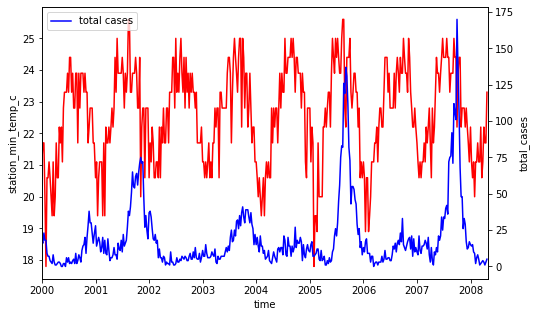

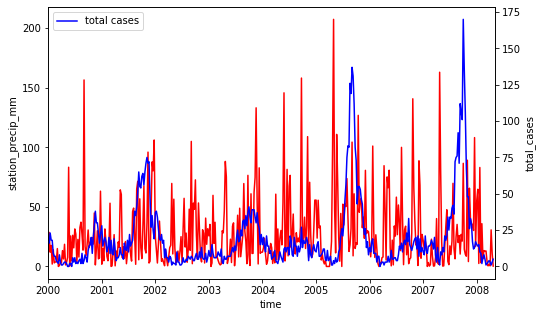

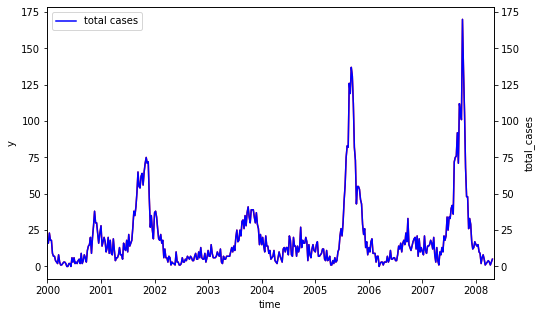

In [27]:
#plotting each feature's time series to see if anything unusual happens in features around big peaks in number of cases
sj_plot = pd.DataFrame(sj.loc[sj.week_start_date.dt.year > 1999,:])
for col in sj.columns:
    if sj[col].dtype in ['float64','int64']:
        f, ax1 = plt.subplots(figsize=(8,5))
        ax1.plot(sj_plot['week_start_date'],sj_plot[col],label='{}'.format(col),c='r')
        ax1.set_xlabel('time')
        ax1.set_ylabel('{}'.format(col))
        ax2 = ax1.twinx()
        ax2.plot(sj_plot['week_start_date'],sj_plot['y'],label='total cases',c='b')
        ax2.set_ylabel('total_cases')
        plt.legend()
        plt.xlim(pd.to_datetime('2000-01-01'), pd.to_datetime('2008-05-01'))
        plt.show()

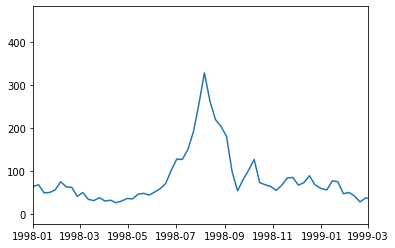

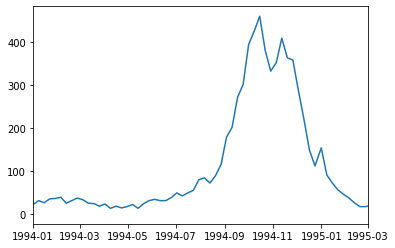

In [28]:
plt.plot(sj['week_start_date'],sj['y'])
plt.xlim(pd.to_datetime('1998-01-01'), pd.to_datetime('1999-03-01'))
plt.show()
plt.plot(sj['week_start_date'],sj['y'])
plt.xlim(pd.to_datetime('1994-01-01'), pd.to_datetime('1995-03-01'))
plt.show()

# Starting Predictions with baseline model

In [29]:
#scaling predictions to reduce the overall trend can help a time series model better understand the trend within each 
#year, month, week, day, ...

#fbprophet has built in normalization of extra regressors (features/columns) so no need to scale them before fitting
#prophet expects dataframe with at least "ds" and "y" columns 

import numpy as np
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

sj_train = pd.DataFrame(sj.loc[:,['week_start_date','y']])
sj_train.rename(columns={'week_start_date':'ds'}, inplace=True)

sj_train.head()
# names are weird, sorry train_train is validation split of our training data 
#splitting off last year of data in sj to use to test to see how well model will predict into future 
sj_train_train = pd.DataFrame(sj_train.loc[sj_train.ds < pd.to_datetime('2007-04-01'),:])
scale.fit(sj_train_train.y.values.reshape(-1,1))
sj_train_test = pd.DataFrame(sj_train.loc[sj_train.ds >= pd.to_datetime('2007-04-01'),:])
sj_train_train.y = scale.transform(sj_train_train.y.values.reshape(-1,1))
sj_train_test.y = scale.transform(sj_train_test.y.values.reshape(-1,1))
sj_train_train.tail()

,ds,y
875,2007-02-26,-0.311063
876,2007-03-05,-0.349472
877,2007-03-12,-0.426288
878,2007-03-19,-0.272655
879,2007-03-26,-0.503105


In [30]:
model = Prophet()
model.fit(sj_train_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
#makes a dataframe for the model to use to predict into future
#takes your time period and adds on how long you specify
#52 weeks added here for one year (the one year we cut off)
future = model.make_future_dataframe(periods=52,freq='1W')

In [32]:
forcast = model.predict(future)

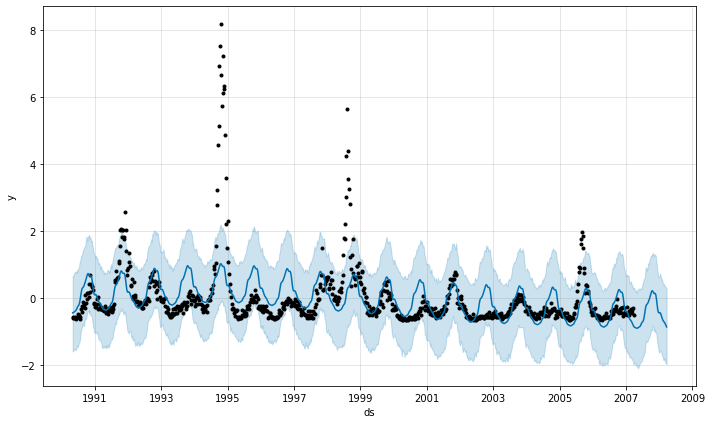

In [33]:
model.plot(forcast)
plt.show()

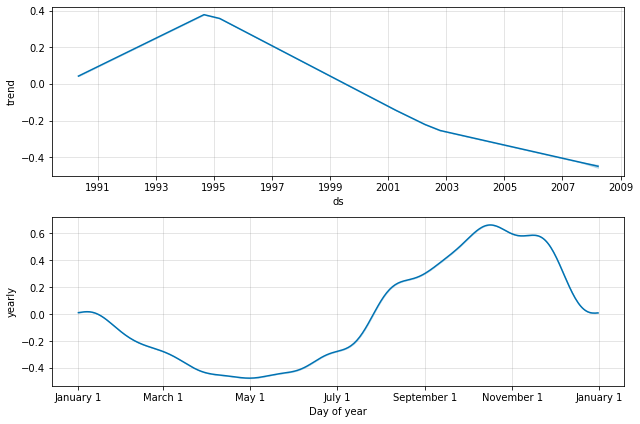

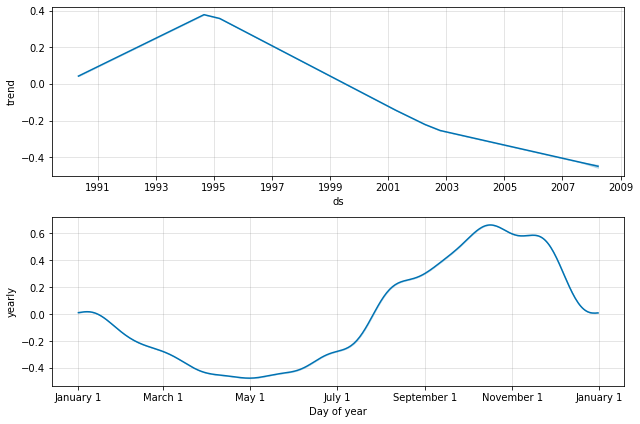

In [34]:
#show the trends that the model is pulling out of the data 
model.plot_components(forcast)

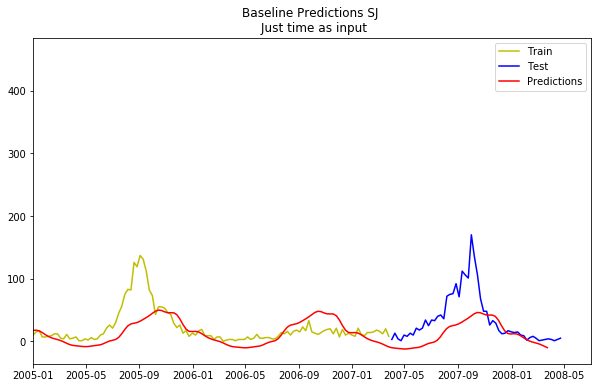

In [35]:
f#plot predictions vs true and testing set
plt.figure(figsize=(10,6))
plt.plot(sj_train_train['ds'], 
            scale.inverse_transform(sj_train_train['y'].values.reshape(-1,1)), c='y',label="Train")
plt.plot(sj_train_test['ds'],
            scale.inverse_transform(sj_train_test['y'].values.reshape(-1,1)),c='b',label="Test")
plt.plot(forcast['ds'],
            scale.inverse_transform(forcast['yhat'].values.reshape(-1,1)),c='r',label="Predictions")
plt.xlim(pd.to_datetime('2005-01-01'), pd.to_datetime('2008-07-01'))
plt.legend()
plt.title('Baseline Predictions SJ \n Just time as input')
plt.show()

In [36]:
#next 3 are built in metrics 
# hard to explain in just comments 
# can read about under "diagnostics" on fbprophet if interested 
# overall better than just cuttinf off last year, last year just easy to absorb
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='500 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 30 forecasts with cutoffs between 1991-12-10 00:00:00 and 2006-03-26 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1991-12-17,1.435351,1.205868,1.653970,0.841185,1991-12-10
1,1991-12-24,1.232156,1.004442,1.461371,0.687552,1991-12-10
2,1992-01-01,1.214761,0.991073,1.429007,0.898797,1991-12-10
3,1992-01-08,1.344516,1.126917,1.570128,1.340493,1991-12-10
4,1992-01-15,1.475398,1.269469,1.705555,1.071635,1991-12-10


In [37]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,37 days,0.521991,0.722490,0.557346,8.833724,0.814103
1,38 days,0.509990,0.714136,0.548864,8.830425,0.805861
2,39 days,0.502277,0.708715,0.543890,8.827474,0.809295
3,40 days,0.521283,0.722000,0.560325,8.939915,0.807692
4,42 days,0.518149,0.719826,0.558331,8.933265,0.801282


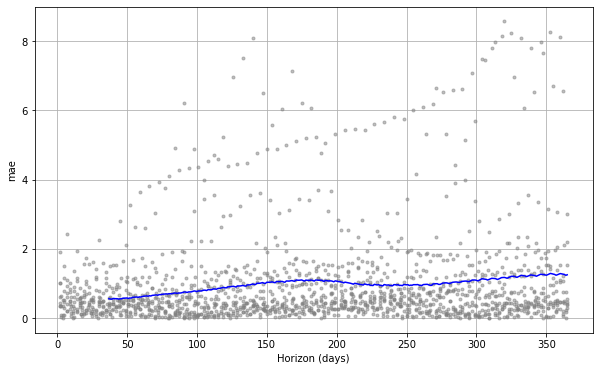

In [38]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

# Tuning model and adding in some features

In [39]:
sj.columns

Index(['city', 'year', 'weekofyear', 'total_cases', 'week_start_date',
       'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'y'],
      dtype='object')

In [40]:
from sklearn.preprocessing import MinMaxScaler
# Can change between minmax and standard with following line, for testing 
scale = MinMaxScaler()
#add some more columns in to training data, tried not to overlap in category too much
sj_train = pd.DataFrame(sj.loc[sj.week_start_date.dt.year > 1999,['week_start_date','y','station_precip_mm','ndvi_nw',
                                 'ndvi_sw','reanalysis_relative_humidity_percent','station_diur_temp_rng_c',
                                              'reanalysis_avg_temp_k','station_min_temp_c','station_max_temp_c','reanalysis_dew_point_temp_k',
                                                                 'reanalysis_precip_amt_kg_per_m2']])
sj_train.rename(columns={'week_start_date':'ds'}, inplace=True)
# sj_train['cap'] = np.max(sj_train['y'])

sj_train.head()
sj_train_train = pd.DataFrame(sj_train.loc[sj_train.ds < pd.to_datetime('2007-04-01'),:])
scale.fit(sj_train_train.y.values.reshape(-1,1))
sj_train_test = pd.DataFrame(sj_train.loc[sj_train.ds >= pd.to_datetime('2007-04-01'),:])
sj_train_train.y = scale.transform(sj_train_train.y.values.reshape(-1,1))
sj_train_test.y = scale.transform(sj_train_test.y.values.reshape(-1,1))
#commented out cap lines are for growth='logistic'
# sj_train_test.cap = scale.transform(sj_train_test.cap.values.reshape(-1,1))
# sj_train_train.cap = scale.transform(sj_train_train.cap.values.reshape(-1,1))
sj_train_train.tail()



,ds,y,station_precip_mm,ndvi_nw,ndvi_sw,reanalysis_relative_humidity_percent,station_diur_temp_rng_c,reanalysis_avg_temp_k,station_min_temp_c,station_max_temp_c,reanalysis_dew_point_temp_k,reanalysis_precip_amt_kg_per_m2
875,2007-02-26,0.131387,22.9,-0.019750,0.054383,78.125714,7.000000,298.514286,21.1,31.7,294.204286,23.12
876,2007-03-05,0.116788,8.4,-0.018900,0.120857,75.014286,7.671429,299.250000,22.2,32.2,294.328571,3.70
877,2007-03-12,0.087591,0.3,0.001800,0.175486,74.025714,8.042857,299.335714,21.7,31.7,294.020000,1.50
878,2007-03-19,0.145985,0.5,0.016550,0.149200,75.438571,7.542857,298.657143,22.2,32.8,293.770000,5.10
879,2007-03-26,0.058394,7.6,0.035575,0.082957,76.784286,7.800000,298.850000,22.8,33.3,294.375714,25.20


In [42]:
#add in regressors and tune parameters.  Fouries and prior scale have to do with how flexible the model is to changes
#higher number is model responds more strongly to that input, changepoint is on a smaller scale than seasonality and regressors
model = Prophet(changepoint_range=.9, growth='linear',yearly_seasonality=8, changepoint_prior_scale=.9,
               seasonality_prior_scale=5)
model.add_seasonality(period=365*2,name='bi-anual',fourier_order=5)
model.add_regressor('station_precip_mm', mode='multiplicative',prior_scale=50)
# model.add_regressor('ndvi_ne',standardize=True, mode='multiplicative')
model.add_regressor('ndvi_nw',standardize=True, mode='multiplicative',prior_scale=10)
model.add_regressor('ndvi_sw',standardize=True, mode='multiplicative',prior_scale=10)
# model.add_regressor('ndvi_se',standardize=True, mode='multiplicative')
model.add_regressor('reanalysis_relative_humidity_percent',standardize=True, mode='multiplicative',prior_scale=20)
model.add_regressor('station_diur_temp_rng_c',standardize=True, mode='multiplicative',prior_scale=20)
model.add_regressor('reanalysis_avg_temp_k',standardize=True, mode='multiplicative',prior_scale=20)
model.add_regressor('station_min_temp_c',standardize=True, mode='multiplicative',prior_scale=20)
model.add_regressor('station_max_temp_c',standardize=True, mode='multiplicative',prior_scale=20)
model.add_regressor('reanalysis_dew_point_temp_k',standardize=True, mode='multiplicative',prior_scale=20)
model.add_regressor('reanalysis_precip_amt_kg_per_m2',standardize=True, mode='multiplicative',prior_scale=50)



model.fit(sj_train_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
future = model.make_future_dataframe(periods=52,freq='1W')
#furture dataframe needs the extra regressor columns, so in real world need to be able to also predict all of the 
#feature variables
#merge with existing one to get last year of data 
#fbprophet uses built in scaling again
sj_merge = pd.DataFrame(sj_train.loc[:,['ds','station_precip_mm','cap','ndvi_nw',
                                 'ndvi_sw','reanalysis_relative_humidity_percent','station_diur_temp_rng_c',
                                              'reanalysis_avg_temp_k','station_min_temp_c','station_max_temp_c','reanalysis_dew_point_temp_k',
                                       'reanalysis_precip_amt_kg_per_m2']])

future_n = pd.merge(sj_merge.set_index(pd.DatetimeIndex(sj_merge['ds'])), 
                    future.set_index(pd.DatetimeIndex(future['ds'])), 
                    how='left', left_index=True, right_index=True)
future_n = future_n.reset_index()
future_n.drop(columns=['ds_x','ds_y'], inplace=True)
# future_n.cap = scale.transform(future_n.cap.values.reshape(-1,1))
future_n.head()

C:\Users\graha\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



,ds,station_precip_mm,cap,ndvi_nw,ndvi_sw,reanalysis_relative_humidity_percent,station_diur_temp_rng_c,reanalysis_avg_temp_k,station_min_temp_c,station_max_temp_c,reanalysis_dew_point_temp_k,reanalysis_precip_amt_kg_per_m2
0,2000-01-01,7.9,NaN,-0.061225,0.086311,76.317143,6.557143,298.307143,21.1,29.4,293.887143,12.34
1,2000-01-08,28.6,NaN,0.161300,0.095833,79.607143,5.314286,298.164286,21.7,29.4,294.355714,32.30
2,2000-01-15,12.0,NaN,0.307850,0.168629,77.342857,5.157143,297.585714,21.7,28.3,293.191429,47.10
3,2000-01-22,17.7,NaN,0.307300,0.291429,70.457143,4.828571,296.478571,20.0,27.2,290.852857,14.70
4,2000-01-29,2.0,NaN,0.228000,0.381420,67.765714,6.842857,296.364286,17.8,28.3,289.827143,0.70


In [44]:
forcast = model.predict(future_n)
forcast.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,station_min_temp_c,station_min_temp_c_lower,station_min_temp_c_upper,station_precip_mm,station_precip_mm_lower,station_precip_mm_upper,yearly,yearly_lower,yearly_upper,yhat
428,2008-03-25,0.193811,NaN,-0.151757,0.267279,-0.271748,0.798035,-0.042195,-0.042195,-0.042195,...,0.090115,0.090115,0.090115,-0.044859,-0.044859,-0.044859,1.445833,1.445833,1.445833,0.031012
429,2008-04-01,0.195152,NaN,-0.205633,0.385264,-0.279782,0.818814,-0.053807,-0.053807,-0.053807,...,0.022230,0.022230,0.022230,-0.047084,-0.047084,-0.047084,1.500917,1.500917,1.500917,0.047967
430,2008-04-08,0.196492,NaN,-0.227759,0.362297,-0.285538,0.846562,-0.063463,-0.063463,-0.063463,...,0.053087,0.053087,0.053087,0.004595,0.004595,0.004595,1.592789,1.592789,1.592789,0.036116
431,2008-04-15,0.197833,NaN,-0.256856,0.429615,-0.313438,0.863391,-0.071849,-0.071849,-0.071849,...,0.053087,0.053087,0.053087,-0.028773,-0.028773,-0.028773,1.718521,1.718521,1.718521,0.044275
432,2008-04-22,0.199174,NaN,-0.256908,0.379461,-0.325355,0.882639,-0.079253,-0.079253,-0.079253,...,-0.045655,-0.045655,-0.045655,-0.047426,-0.047426,-0.047426,1.871889,1.871889,1.871889,0.023339


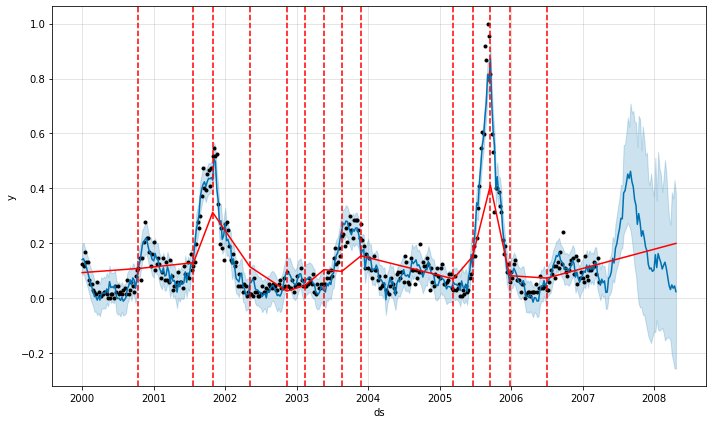

In [45]:
from fbprophet.plot import add_changepoints_to_plot
#add visualization for change point
#good for tweaking stuff, before changes there were 0 changepoints, had to increase prior_scale
fig = model.plot(forcast)
a = add_changepoints_to_plot(fig.gca(), model, forcast)

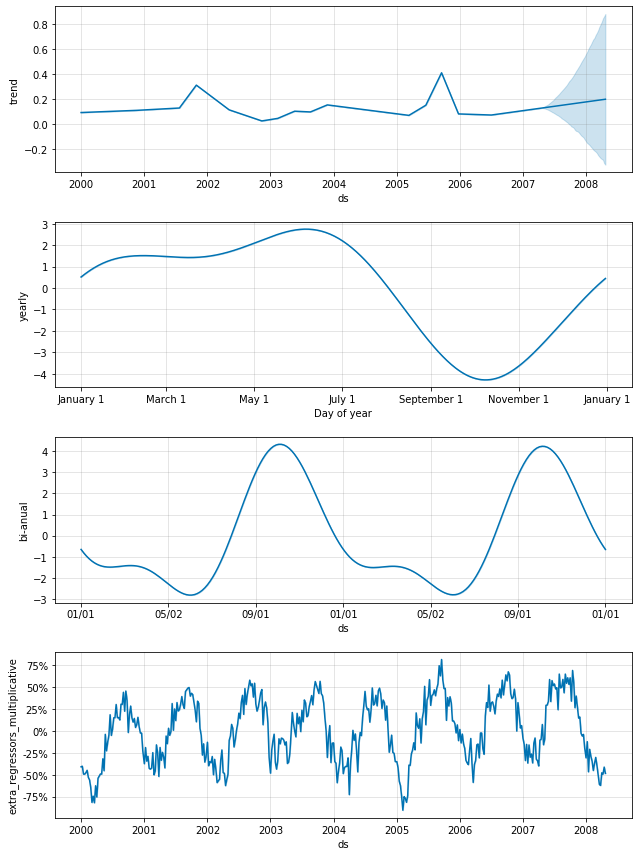

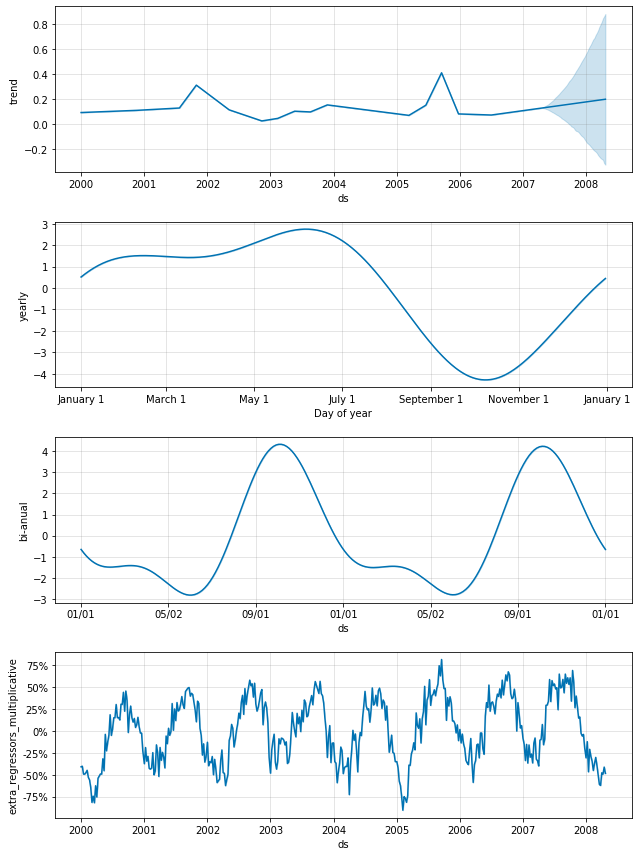

In [46]:
model.plot_components(forcast)
#bi-anual seasonality addition helps accuracy, but messes with yearly trend, need to fix it or just turn off yearly 

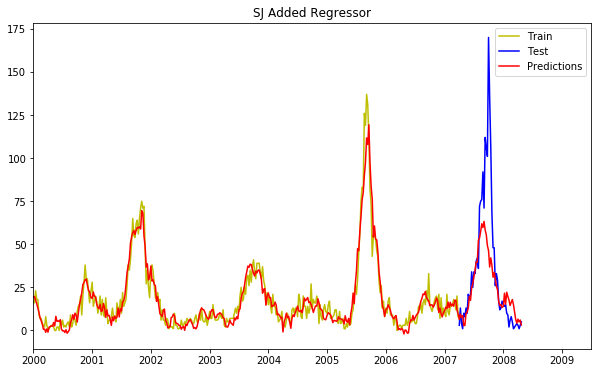

In [47]:
#vis results
plt.figure(figsize=(10,6))
plt.plot(sj_train_train['ds'], 
            scale.inverse_transform(sj_train_train['y'].values.reshape(-1,1)), c='y',label="Train")
plt.plot(sj_train_test['ds'],
            scale.inverse_transform(sj_train_test['y'].values.reshape(-1,1)),c='b',label="Test")
plt.plot(forcast['ds'],
            scale.inverse_transform(forcast['yhat'].values.reshape(-1,1)),c='r',label="Predictions")
# plt.plot(sj_train_train['ds'], 
#             sj_train_train['y']**3, c='y',label="Train")
# plt.plot(sj_train_test['ds'],
#             sj_train_test['y']**3,c='b',label="Test")
# plt.plot(forcast['ds'],
#             forcast['yhat']**3,c='r',label="Predictions")

plt.xlim(pd.to_datetime('2000-01-01'), pd.to_datetime('2009-07-01'))
plt.legend()
plt.title('SJ Added Regressor')
plt.show()

0.9107668740752426
0.4843510835109559


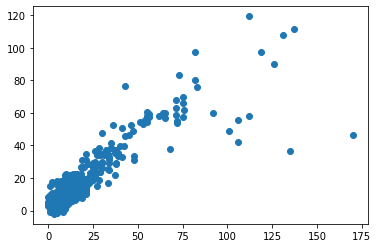

In [48]:
from sklearn.metrics import r2_score
#train and test r2
#model still can't quite predict the huge jump in testng year of 2008

plt.scatter(sj_train['y'],scale.inverse_transform(forcast['yhat'].values.reshape(-1,1)))
print(r2_score(scale.inverse_transform(sj_train_train['y'].values.reshape(-1,1)),scale.inverse_transform(forcast.loc[forcast.ds < pd.to_datetime('2007-04-01'), 'yhat'].values.reshape(-1,1)).reshape(len(sj_train_train),)))
print(r2_score(scale.inverse_transform(sj_train_test['y'].values.reshape(-1,1)),scale.inverse_transform(forcast.loc[forcast.ds >= pd.to_datetime('2007-04-01'), 'yhat'].values.reshape(-1,1)).reshape(len(sj_train_test),)))

In [49]:
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '730 days')
df_cv.head()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2002-04-11 00:00:00 and 2005-03-26 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2002-04-16,0.029151,-0.000513,0.065203,0.043796,2002-04-11
1,2002-04-23,-0.003753,-0.037375,0.028103,0.007299,2002-04-11
2,2002-04-30,-0.034549,-0.065732,0.000819,0.021898,2002-04-11
3,2002-05-07,-0.052577,-0.087667,-0.019967,0.014599,2002-04-11
4,2002-05-14,-0.100913,-0.134373,-0.066610,0.014599,2002-04-11


In [50]:
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,coverage
0,73 days,0.004555,0.067491,0.048191,0.569444
1,75 days,0.005373,0.073298,0.051593,0.555556
2,77 days,0.005375,0.073313,0.051615,0.555556
3,78 days,0.005410,0.073552,0.052217,0.541667
4,80 days,0.005667,0.075280,0.054518,0.513889


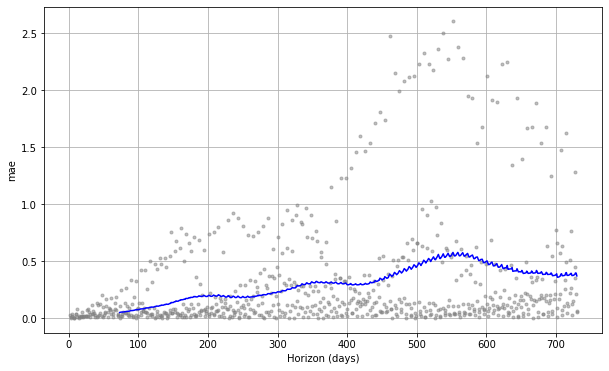

In [51]:
fig = plot_cross_validation_metric(df_cv, metric='mae')